In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import matplotlib as mpl
import pandas as pd
import pylab as P
import numpy as np
import netCDF4
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import *

In [3]:
# get file containing heights, pressures for L85 ancil
filename='/Users/ptg21/data/projects/TRANSCOM/N48_ancil_creation/xjcira.p.nc'

ncfile2     = netCDF4.Dataset(filename)

lon2        = ncfile2.variables['longitude'][:]
lat2        = ncfile2.variables['latitude'][:]
press       = ncfile2.variables['p'][:]
hybrid_ht   = ncfile2.variables['hybrid_ht'][:]
nheights    = len(hybrid_ht)
times2      = ncfile2.variables['t']
nmonths2, nheights2, ny2, nx2 = np.shape(press)

# if required, can shift lon grid as follows
#press,lon2 = shiftgrid(180.,press,lon2,start=False)

In [4]:
mrch2br2 = 2*81+2+12.
mrair = 28.8


In [14]:
##ordonez  = stash63

filename='/Users/ptg21/data/projects/TRANSCOM/N48_results/ch2br2_k4.nc'
ncfile1     = netCDF4.Dataset(filename)
lona        = ncfile1.variables['longitude'][:]
lata        = ncfile1.variables['latitude'][:]
hybrid_ht   = ncfile1.variables['hybrid_ht']
CH2Br2       = ncfile1.variables['field34063'][:,:,:]

ordonez_CH2Br2 = CH2Br2* mrair/mrch2br2/1e-12

nlevelsa, ntimesa, nya, nxa = np.shape(CH2Br2)

ch2br2_zonal_mean=np.empty([nmonths2, nheights, ny2])

imonth=0
for ilev in range(0,nheights):
        for ivar in range (0,ny2):
            ch2br2_zonal_mean[imonth,ilev,ivar] = np.mean(ordonez_CH2Br2[imonth,ilev,ivar,:])

ch2br2_tropical_mean = np.empty([nmonths2,nheights])

for ilev in range(0,nheights):
        ch2br2_tropical_mean[imonth, ilev]=np.mean(ch2br2_zonal_mean[imonth,ilev,ny2/2-8:ny2/2+7])

        
press_prof = press[0,:,nx2/2,ny2/2]/100

ordonez_ch2br2_annual_mean_prof = np.empty([nheights])

ordonez_ch2br2_annual_stdev_prof = np.empty([nheights])

for ilev in range(0,nheights):
    ordonez_ch2br2_annual_mean_prof[ilev] = ch2br2_tropical_mean[imonth,ilev]
    ordonez_ch2br2_annual_stdev_prof[ilev] = np.std(ch2br2_tropical_mean[:,ilev])
#    ordonez_ch2br2_annual_stdev_prof[ilev] = ch2br2_tropical_mean[:,ilev].max()-ch2br2_tropical_mean[:,ilev].min()
#ordonez_ch2br2_annual_mean_prof = ordonez_ch2br2_annual_mean_prof[np.logical_not(np.isnan(ordonez_ch2br2_annual_mean_prof))]

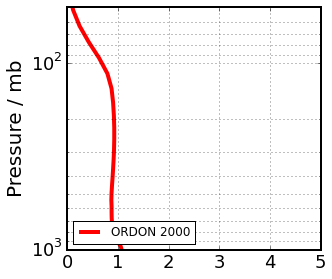

In [15]:
hoss_data=P.loadtxt('/Users/ptg21/data/projects/TRANSCOM/hossaini_res.txt')
plt.clf()
mpl.rcParams['font.size']=18
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams["lines.markeredgewidth"]=1
mpl.rcParams
plt.figure(figsize=(10,10),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

plt.subplot(2,2,1, yscale="log")



plt.hold(True)
plt.grid(True,which='both')

#plt.plot(hoss_data[:,0], hoss_data[:,1] , 'o--', color = '0.75', lw=4, markersize=12, label='TOMCAT 2007')

# plt.fill_betweenx(press_prof, 
#                   ordonez_ch2br2_annual_mean_prof-ordonez_ch2br2_annual_stdev_prof, 
#                   ordonez_ch2br2_annual_mean_prof+ordonez_ch2br2_annual_stdev_prof,
#                   alpha=0.2, edgecolor='red', facecolor='red',
#                   linewidth=4,  antialiased=True)

plt.plot(ordonez_ch2br2_annual_mean_prof[:], press_prof, 'r-', lw=4 ,label='ORDON 2000')

plt.ylim([1000,50])
plt.xlim([0,5])
plt.ylabel('Pressure / mb', fontsize=20)
#plt.xlabel('CH$_2$Br$_2$ / pptv', fontsize=20 )
plt.legend(fontsize=12, loc = 'lower left')


ValueError: Data has no positive values, and therefore can not be log-scaled.

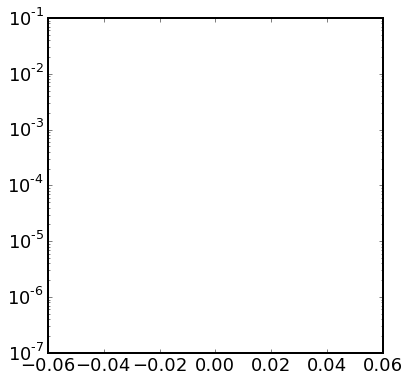

In [16]:
hoss_data=P.loadtxt('/Users/ptg21/data/projects//transcom/hossaini_res.txt')
plt.clf()
plt.figure(figsize=(6,6),dpi=200)
plt.subplot(111, yscale="log")

plt.hold(True)
plt.errorbar(ordonez_ch2br2_annual_mean_prof[:], press_prof, xerr=ordonez_ch2br2_annual_stdev_prof)#, 'o--', label='UKCA')#, ch2br2_std)
plt.plot(hoss_data[:,0], hoss_data[:,1] , label='TOMCAT 2007')
plt.legend()
plt.ylim([1000,100])
plt.xlim([0,1.5])


In [23]:
##ordonez  = stash63

filename='/Users/ptg21/data/projects/TRANSCOM/N48_results/ordonez_ch2br2_apr_01.nc'
ncfile1     = netCDF4.Dataset(filename)
lona        = ncfile1.variables['longitude'][:]
lata        = ncfile1.variables['latitude'][:]
hybrid_ht   = ncfile1.variables['hybrid_ht']
CH2Br2       = ncfile1.variables['field563'][:,:,:]

ordonez_CH2Br2 = CH2Br2* mrair/mrch2br2/1e-12

nlevelsa, ntimesa, nya, nxa = np.shape(CH2Br2)

ch2br2_zonal_mean=np.empty([nmonths2, nheights, ny2])

imonth=0
for ilev in range(0,nheights):
        for ivar in range (0,ny2):
            ch2br2_zonal_mean[imonth,ilev,ivar] = np.mean(ordonez_CH2Br2[imonth,ilev,ivar,:])

ch2br2_tropical_mean = np.empty([nmonths2,nheights])

for ilev in range(0,nheights):
        ch2br2_tropical_mean[imonth, ilev]=np.mean(ch2br2_zonal_mean[imonth,ilev,ny2/2-8:ny2/2+7])

        
press_prof = press[0,:,nx2/2,ny2/2]/100

ordonez_ch2br2_annual_mean_prof = np.empty([nheights])

ordonez_ch2br2_annual_stdev_prof = np.empty([nheights])

for ilev in range(0,nheights):
    ordonez_ch2br2_annual_mean_prof[ilev] = ch2br2_tropical_mean[imonth,ilev]
#    ch2br2_annual_stdev_prof[ilev] = np.std(ch2br2_tropical_mean[:,ilev])
    ordonez_ch2br2_annual_stdev_prof[ilev] = ch2br2_tropical_mean[:,ilev].max()-ch2br2_tropical_mean[:,ilev].min()
#ordonez_ch2br2_annual_mean_prof = ordonez_ch2br2_annual_mean_prof[np.logical_not(np.isnan(ordonez_ch2br2_annual_mean_prof))]

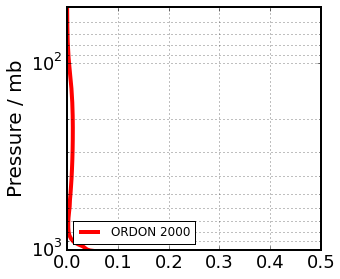

In [24]:
hoss_data=P.loadtxt('/Users/ptg21/data/projects/TRANSCOM/hossaini_res.txt')
plt.clf()
mpl.rcParams['font.size']=18
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams["lines.markeredgewidth"]=1
mpl.rcParams
plt.figure(figsize=(10,10),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

plt.subplot(2,2,1, yscale="log")



plt.hold(True)
plt.grid(True,which='both')

#plt.plot(hoss_data[:,0], hoss_data[:,1] , 'o--', color = '0.75', lw=4, markersize=12, label='TOMCAT 2007')

# plt.fill_betweenx(press_prof, 
#                   ordonez_ch2br2_annual_mean_prof-ordonez_ch2br2_annual_stdev_prof, 
#                   ordonez_ch2br2_annual_mean_prof+ordonez_ch2br2_annual_stdev_prof,
#                   alpha=0.2, edgecolor='red', facecolor='red',
#                   linewidth=4,  antialiased=True)

plt.plot(ordonez_ch2br2_annual_mean_prof[:], press_prof, 'r-', lw=4 ,label='ORDON 2000')

plt.ylim([1000,50])
plt.xlim([0,0.5])
plt.ylabel('Pressure / mb', fontsize=20)
#plt.xlabel('CH$_2$Br$_2$ / pptv', fontsize=20 )
plt.legend(fontsize=12, loc = 'lower left')



(0, 1.5)

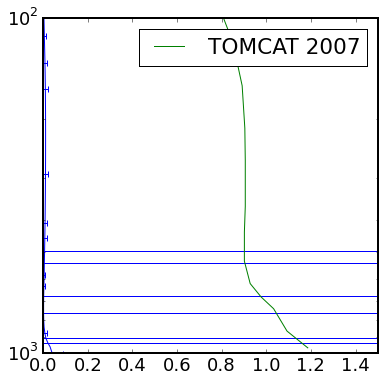

In [28]:
hoss_data=P.loadtxt('/Users/ptg21/data/projects//transcom/hossaini_res.txt')
plt.clf()
plt.figure(figsize=(6,6),dpi=200)
plt.subplot(111, yscale="log")

plt.hold(True)
plt.errorbar(ordonez_ch2br2_annual_mean_prof[:], press_prof, xerr=ordonez_ch2br2_annual_stdev_prof)#, 'o--', label='UKCA')#, ch2br2_std)
plt.plot(hoss_data[:,0], hoss_data[:,1] , label='TOMCAT 2007')
plt.legend()
plt.ylim([1000,100])
plt.xlim([0,1.5])
